<a href="https://colab.research.google.com/github/shreyab1111/A-Mask-R-CNN-model-for-identifying-cyclones/blob/master/RCNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!unzip '/content/drive/MyDrive/Mask-RCNN/Sample Dataset/Images.zip'

Archive:  /content/drive/MyDrive/Mask-RCNN/Sample Dataset/Images.zip
   creating: Images/
  inflating: Images/airplane_007.jpg  
  inflating: Images/airplane_006.jpg  
  inflating: Images/airplane_005.jpg  
  inflating: Images/airplane_004.jpg  
  inflating: Images/airplane_003.jpg  
  inflating: Images/airplane_002.jpg  
  inflating: Images/airplane_001.jpg  
  inflating: Images/428503.jpg       
  inflating: Images/428501.jpg       
  inflating: Images/428492.jpg       
  inflating: Images/428491.jpg       
  inflating: Images/428483.jpg       
  inflating: Images/428482.jpg       
  inflating: Images/428481.jpg       
  inflating: Images/428472.jpg       
  inflating: Images/428462.jpg       
  inflating: Images/428461.jpg       
  inflating: Images/428452.jpg       
  inflating: Images/428451.jpg       
  inflating: Images/42850.jpg        
  inflating: Images/42849.jpg        
  inflating: Images/42848.jpg        
  inflating: Images/42847.jpg        
  inflating: Images/airplane_

In [2]:
!unzip '/content/drive/MyDrive/Mask-RCNN/Sample Dataset/Airplanes_Annotations.zip'

Archive:  /content/drive/MyDrive/Mask-RCNN/Sample Dataset/Airplanes_Annotations.zip
   creating: Airplanes_Annotations/
 extracting: Airplanes_Annotations/airplane_095.csv  
  inflating: Airplanes_Annotations/airplane_094.csv  
  inflating: Airplanes_Annotations/airplane_093.csv  
  inflating: Airplanes_Annotations/airplane_092.csv  
  inflating: Airplanes_Annotations/airplane_091.csv  
  inflating: Airplanes_Annotations/airplane_090.csv  
 extracting: Airplanes_Annotations/airplane_089.csv  
 extracting: Airplanes_Annotations/airplane_088.csv  
 extracting: Airplanes_Annotations/airplane_087.csv  
 extracting: Airplanes_Annotations/airplane_086.csv  
  inflating: Airplanes_Annotations/airplane_085.csv  
 extracting: Airplanes_Annotations/airplane_084.csv  
  inflating: Airplanes_Annotations/airplane_083.csv  
  inflating: Airplanes_Annotations/airplane_082.csv  
 extracting: Airplanes_Annotations/airplane_081.csv  
 extracting: Airplanes_Annotations/airplane_080.csv  
 extracting: Air

In [3]:
import os,cv2,keras
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

In [4]:
path = "Images"
annot = "Airplanes_Annotations"

In [5]:
os.listdir(annot)

['airplane_145.csv',
 'airplane_086.csv',
 'airplane_291.csv',
 'airplane_162.csv',
 'airplane_683.csv',
 'airplane_225.csv',
 'airplane_457.csv',
 'airplane_364.csv',
 'airplane_332.csv',
 'airplane_352.csv',
 'airplane_197.csv',
 'airplane_518.csv',
 'airplane_361.csv',
 'airplane_160.csv',
 'airplane_098.csv',
 'airplane_273.csv',
 'airplane_435.csv',
 'airplane_649.csv',
 'airplane_503.csv',
 'airplane_695.csv',
 'airplane_542.csv',
 'airplane_490.csv',
 'airplane_179.csv',
 'airplane_173.csv',
 'airplane_497.csv',
 'planes2.csv',
 'airplane_618.csv',
 'airplane_328.csv',
 'airplane_381.csv',
 'airplane_372.csv',
 'airplane_453.csv',
 'airplane_304.csv',
 'airplane_687.csv',
 'airplane_224.csv',
 'airplane_153.csv',
 'airplane_258.csv',
 'airplane_043.csv',
 'airplane_265.csv',
 'airplane_533.csv',
 'airplane_571.csv',
 'airplane_040.csv',
 'airplane_276.csv',
 'airplane_691.csv',
 'airplane_363.csv',
 'airplane_283.csv',
 'airplane_061.csv',
 'airplane_017.csv',
 'airplane_141.csv

0
airplane_145.csv
airplane_145.jpg


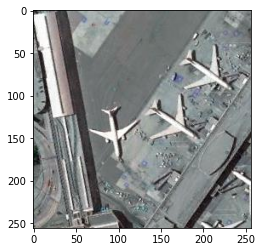

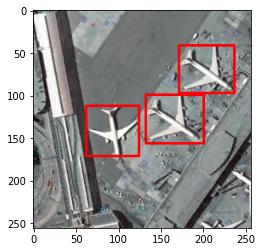

In [6]:
for e,i in enumerate(os.listdir(annot)):
    print(e)
    if e < 10:
        filename = i.split(".")[0]+".jpg"
        print(i)
        print(filename)
        img = cv2.imread(os.path.join(path,filename))
        df = pd.read_csv(os.path.join(annot,i))
        plt.figure()
        plt.imshow(img)
        for row in df.iterrows():
            x1 = int(row[1][0].split(" ")[0])
            y1 = int(row[1][0].split(" ")[1])
            x2 = int(row[1][0].split(" ")[2])
            y2 = int(row[1][0].split(" ")[3])
            cv2.rectangle(img,(x1,y1),(x2,y2),(255,0,0), 2)
        plt.figure() #Create a new figure
        plt.imshow(img)
    break

In [7]:
cv2.setUseOptimized(True); #The function turns on or off the optimized code in OpenCV
ss = cv2.ximgproc.segmentation.createSelectiveSearchSegmentation()

#In Exhaustive search we use sliding window of different size to locate objects in the image. This is computationally very expensive.

#https://docs.opencv.org/4.x/d5/df0/group__ximgproc__segmentation.html

#in Selective Search Segmentatiopn, we first use Graph-Based Image Segmentation. Then combine small pieces into larger ones by Greedy Algorithm
#Use the segmented region proposals to generate candidate object locations.

In this case we can have 2 classes. These classes are that whether the proposed region can be a foreground (i.e. Airplane) or a background

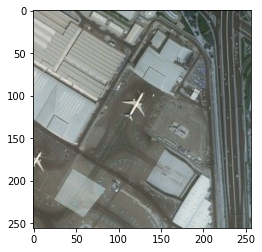

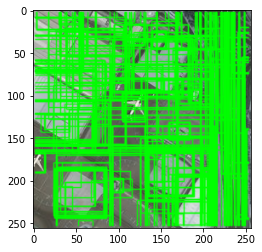

In [8]:
im = cv2.imread(os.path.join(path,"42850.jpg"))
plt.imshow(im)
ss.setBaseImage(im)
ss.switchToSelectiveSearchFast()
rects = ss.process() #getting proposed regions
imOut = im.copy()
for i, rect in (enumerate(rects)):
    x, y, w, h = rect
    cv2.rectangle(imOut, (x, y), (x+w, y+h), (0, 255, 0), 1, cv2.LINE_AA)
plt.figure()
plt.imshow(imOut)

In [9]:
train_images=[]
train_labels=[]

In [10]:
def get_iou(bb1, bb2):
    assert bb1['x1'] < bb1['x2']
    assert bb1['y1'] < bb1['y2']
    assert bb2['x1'] < bb2['x2']
    assert bb2['y1'] < bb2['y2']

    x_left = max(bb1['x1'], bb2['x1'])
    y_top = max(bb1['y1'], bb2['y1'])
    x_right = min(bb1['x2'], bb2['x2'])
    y_bottom = min(bb1['y2'], bb2['y2'])

    if x_right < x_left or y_bottom < y_top:
        return 0.0

    intersection_area = (x_right - x_left) * (y_bottom - y_top)

    bb1_area = (bb1['x2'] - bb1['x1']) * (bb1['y2'] - bb1['y1'])
    bb2_area = (bb2['x2'] - bb2['x1']) * (bb2['y2'] - bb2['y1'])

    iou = intersection_area / float(bb1_area + bb2_area - intersection_area)
    assert iou >= 0.0
    assert iou <= 1.0
    return iou

In [11]:
ss = cv2.ximgproc.segmentation.createSelectiveSearchSegmentation()

In [20]:
j=1
for e,i in enumerate(os.listdir(annot)):
  if(j<=100):
    try:
        if i.startswith("airplane"):
            filename = i.split(".")[0]+".jpg"
            print(e,filename)
            image = cv2.imread(os.path.join(path,filename))
            df = pd.read_csv(os.path.join(annot,i))
            gtvalues=[]
            for row in df.iterrows():
                x1 = int(row[1][0].split(" ")[0])
                y1 = int(row[1][0].split(" ")[1])
                x2 = int(row[1][0].split(" ")[2])
                y2 = int(row[1][0].split(" ")[3])
                gtvalues.append({"x1":x1,"x2":x2,"y1":y1,"y2":y2})
            ss.setBaseImage(image)
            ss.switchToSelectiveSearchFast()
            ssresults = ss.process()
            imout = image.copy()
            counter = 0
            falsecounter = 0
            flag = 0
            fflag = 0
            bflag = 0
            for e,result in enumerate(ssresults):
                if e < 2000 and flag == 0:
                    for gtval in gtvalues:
                        x,y,w,h = result
                        iou = get_iou(gtval,{"x1":x,"x2":x+w,"y1":y,"y2":y+h})
                        if counter < 30:
                            if iou > 0.70:
                                timage = imout[y:y+h,x:x+w]
                                resized = cv2.resize(timage, (224,224), interpolation = cv2.INTER_AREA)
                                train_images.append(resized)
                                train_labels.append(1)
                                counter += 1
                        else :
                            fflag =1
                        if falsecounter <30:
                            if iou < 0.3:
                                timage = imout[y:y+h,x:x+w]
                                resized = cv2.resize(timage, (224,224), interpolation = cv2.INTER_AREA)
                                train_images.append(resized)
                                train_labels.append(0)
                                falsecounter += 1
                        else :
                            bflag = 1
                    if fflag == 1 and bflag == 1:
                        print("inside")
                        flag = 1
    except Exception as e:
        print(e)
        print("error in "+filename)
        continue
  j=j+1

0 airplane_145.jpg
1 airplane_086.jpg
2 airplane_291.jpg
inside
3 airplane_162.jpg
4 airplane_683.jpg
5 airplane_225.jpg
inside
6 airplane_457.jpg
7 airplane_364.jpg
8 airplane_332.jpg
inside
9 airplane_352.jpg
10 airplane_197.jpg
11 airplane_518.jpg
12 airplane_361.jpg
13 airplane_160.jpg
14 airplane_098.jpg
15 airplane_273.jpg
16 airplane_435.jpg
17 airplane_649.jpg
18 airplane_503.jpg
19 airplane_695.jpg
20 airplane_542.jpg
21 airplane_490.jpg
22 airplane_179.jpg
23 airplane_173.jpg
24 airplane_497.jpg
inside
26 airplane_618.jpg
27 airplane_328.jpg
inside
28 airplane_381.jpg
29 airplane_372.jpg
30 airplane_453.jpg
31 airplane_304.jpg
32 airplane_687.jpg
33 airplane_224.jpg
34 airplane_153.jpg
35 airplane_258.jpg
36 airplane_043.jpg
37 airplane_265.jpg
38 airplane_533.jpg
39 airplane_571.jpg
40 airplane_040.jpg
41 airplane_276.jpg
inside
42 airplane_691.jpg
43 airplane_363.jpg
44 airplane_283.jpg
45 airplane_061.jpg
46 airplane_017.jpg
47 airplane_141.jpg
48 airplane_596.jpg
inside
4

In [21]:
X_new = np.array(train_images)
y_new = np.array(train_labels)

In [22]:
X_new.shape

(5580, 224, 224, 3)

In [23]:
from keras.layers import Dense
from keras import Model
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.vgg16 import VGG16

In [24]:
vggmodel = VGG16(weights='imagenet', include_top=True)
vggmodel.summary()

553476096/553467096 [==============================] - 3s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                            

In [25]:
for layers in (vggmodel.layers)[:15]:
    print(layers)
    layers.trainable = False

In [26]:
X= vggmodel.layers[-2].output

In [27]:
predictions = Dense(2, activation="softmax")(X)

In [29]:
model_final = Model(vggmodel.input, predictions)

In [31]:
from tensorflow.keras.optimizers import Adam
opt = Adam(lr=0.0001)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [32]:
model_final.compile(loss = keras.losses.categorical_crossentropy, optimizer = opt, metrics=["accuracy"])
model_final.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

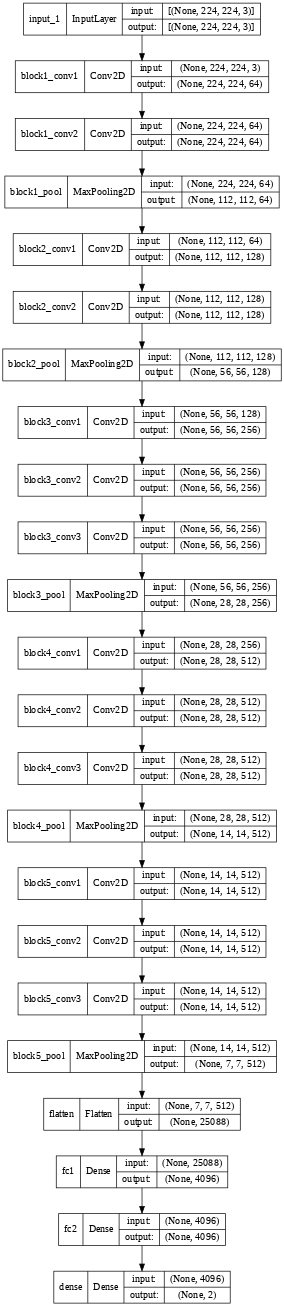

In [35]:
tf.keras.utils.plot_model(
    model_final, to_file='model.png', show_shapes=True, show_dtype=False,
    show_layer_names=True, rankdir='TB', expand_nested=True, dpi=50,
    layer_range=None, show_layer_activations=False
)

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer

In [37]:
class MyLabelBinarizer(LabelBinarizer): #one hot encoding
    def transform(self, y):
        Y = super().transform(y)
        if self.y_type_ == 'binary':
            return np.hstack((Y, 1-Y))
        else:
            return Y
    def inverse_transform(self, Y, threshold=None):
        if self.y_type_ == 'binary':
            return super().inverse_transform(Y[:, 0], threshold)
        else:
            return super().inverse_transform(Y, threshold)

In [38]:
lenc = MyLabelBinarizer()
Y =  lenc.fit_transform(y_new)

In [39]:
X_train, X_test , y_train, y_test = train_test_split(X_new,Y,test_size=0.10)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(5022, 224, 224, 3) (558, 224, 224, 3) (5022, 2) (558, 2)


In [40]:
trdata = ImageDataGenerator(horizontal_flip=True, vertical_flip=True, rotation_range=90)
traindata = trdata.flow(x=X_train, y=y_train)
tsdata = ImageDataGenerator(horizontal_flip=True, vertical_flip=True, rotation_range=90)
testdata = tsdata.flow(x=X_test, y=y_test)

In [41]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

In [42]:
checkpoint = ModelCheckpoint("ieeercnn_vgg16_1.h5", monitor='val_loss', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)
early = EarlyStopping(monitor='val_loss', min_delta=0, patience=100, verbose=1, mode='auto')

In [43]:
history = model_final.fit_generator(generator= traindata, steps_per_epoch= 10, epochs= 10, validation_data= testdata, validation_steps=2, callbacks=[checkpoint,early])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """Entry point for launching an IPython kernel.


Epoch 1/10
10/10 [==============================] - ETA: 0s - loss: 0.7442 - accuracy: 0.7812
Epoch 00001: val_loss improved from inf to 0.33553, saving model to ieeercnn_vgg16_1.h5
10/10 [==============================] - 29s 2s/step - loss: 0.7442 - accuracy: 0.7812 - val_loss: 0.3355 - val_accuracy: 0.8750
Epoch 2/10
10/10 [==============================] - ETA: 0s - loss: 0.3739 - accuracy: 0.8906
Epoch 00002: val_loss improved from 0.33553 to 0.19256, saving model to ieeercnn_vgg16_1.h5
10/10 [==============================] - 22s 2s/step - loss: 0.3739 - accuracy: 0.8906 - val_loss: 0.1926 - val_accuracy: 0.8906
Epoch 3/10
10/10 [==============================] - ETA: 0s - loss: 0.2673 - accuracy: 0.9000
Epoch 00003: val_loss improved from 0.19256 to 0.16645, saving model to ieeercnn_vgg16_1.h5
10/10 [==============================] - 16s 2s/step - loss: 0.2673 - accuracy: 0.9000 - val_loss: 0.1665 - val_accuracy: 0.9375
Epoch 4/10
10/10 [==============================] - ETA: 0s

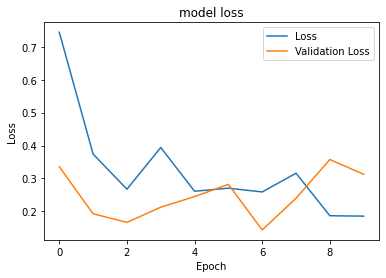

<Figure size 432x288 with 0 Axes>

In [44]:
import matplotlib.pyplot as plt
# plt.plot(hist.history["acc"])
# plt.plot(hist.history['val_acc'])
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("model loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(["Loss","Validation Loss"])
plt.show()
plt.savefig('chart loss.png')

not plane


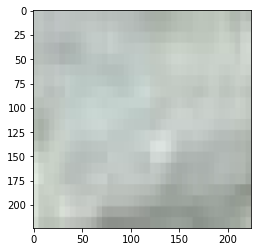

In [48]:
im = X_test[160]
plt.imshow(im)
img = np.expand_dims(im, axis=0)
out= model_final.predict(img)
if out[0][0] > out[0][1]:
    print("plane")
else:
    print("not plane")

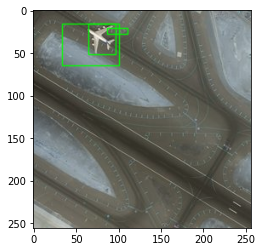

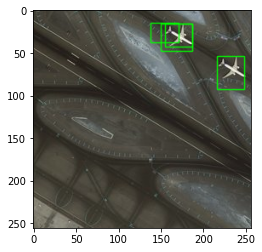

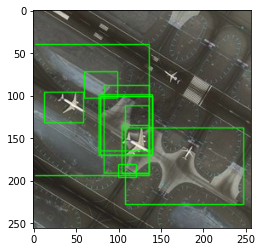

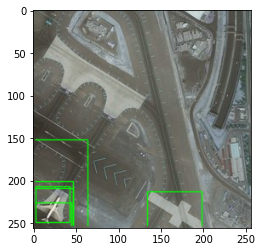

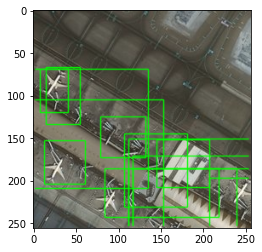

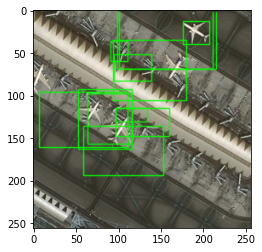

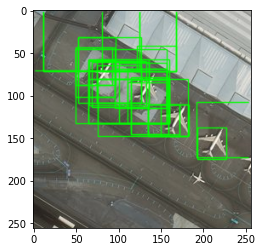

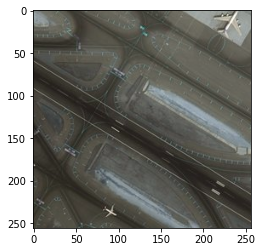

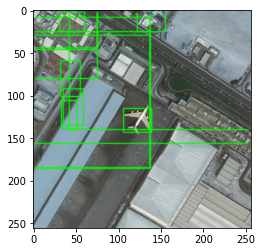

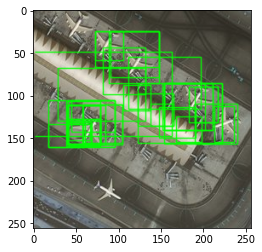

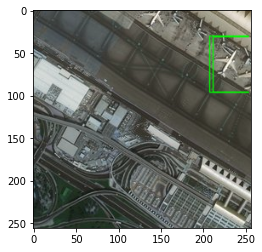

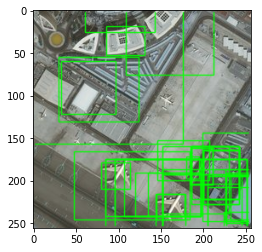

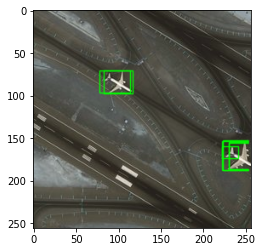

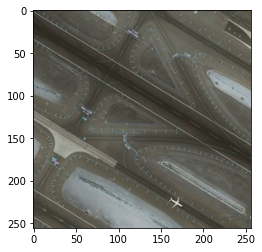

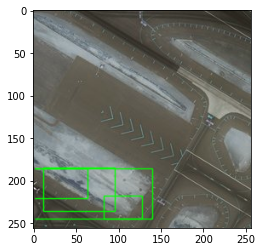

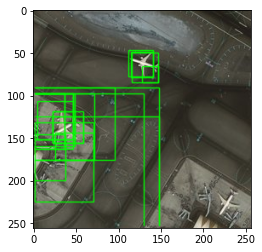

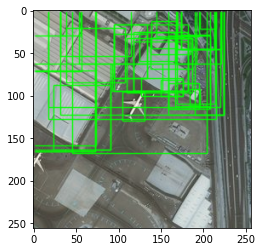

In [49]:
z=0
for e,i in enumerate(os.listdir(path)):
    if i.startswith("4"):
        z += 1
        img = cv2.imread(os.path.join(path,i))
        ss.setBaseImage(img)
        ss.switchToSelectiveSearchFast()
        ssresults = ss.process()
        imout = img.copy()
        for e,result in enumerate(ssresults):
            if e < 2000:
                x,y,w,h = result
                timage = imout[y:y+h,x:x+w]
                resized = cv2.resize(timage, (224,224), interpolation = cv2.INTER_AREA)
                img = np.expand_dims(resized, axis=0)
                out= model_final.predict(img)
                if out[0][0] > 0.65:
                    cv2.rectangle(imout, (x, y), (x+w, y+h), (0, 255, 0), 1, cv2.LINE_AA)
        plt.figure()
        plt.imshow(imout)